In [1]:
import pandas as pd
import numpy as np

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Customer churn prediction').getOrCreate()
spark

In [32]:
df = spark.read.csv('C:/Users/md.owais/Desktop/Customer Chun Prediction/data/train_churn.csv', inferSchema=True, header=True)

In [33]:
df.show()

+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|state|account_length|    area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churn|
+-----+--------------+-------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------

In [34]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: string (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)
 |-- churn: string (nullable = true)



Shape

In [35]:
shape = df.count(), len(df.columns)
shape

(4250, 20)

Mising Values Analysis

In [36]:
from pyspark.sql.functions import isnan, count, when, col, expr, substring
total_col = df.columns
df.select([count(when( col(c).contains('NA') | col(c).contains('None') \
                      | (col(c) == "NaN") | (col(c) == '') | (col(c) == 'NULL')\
                      | col(c).isNull() | isnan(c) ,c)).alias(c) for c in total_col]).show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churn|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------------------

Duplicates Records analysis


In [37]:
df.count(), df.distinct().count()

(4250, 4250)

In [38]:
df.toPandas()

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

EDA

In [39]:
# 1. Remove area_code_ from area_code column
# Remove id column


In [40]:
df=df.drop('id')

In [41]:
df.toPandas()

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245  

In [42]:
df=df.withColumn('area_code', expr("substring(area_code,11,12)"))

In [43]:
df.show()

+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-----+
|state|account_length|area_code|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churn|
+-----+--------------+---------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+--------------------

Conversion of area_code int0 Integer Types


In [44]:
from pyspark.sql.types import IntegerType, StringType,FloatType,DoubleType
df=df.withColumn('area_code', df['area_code'].cast(IntegerType()))

In [45]:
df.select('area_code').dtypes

[('area_code', 'int')]

In [46]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: integer (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)
 |-- churn: string (nullable = true)



In [49]:
df.toPandas().describe()

account_length    area_code  number_vmail_messages  total_day_minutes  \
count     4250.000000  4250.000000            4250.000000        4250.000000   
mean       100.236235   436.816000               7.631765         180.259600   
std         39.698401    42.183514              13.439882          54.012373   
min          1.000000   408.000000               0.000000           0.000000   
25%         73.000000   408.000000               0.000000         143.325000   
50%        100.000000   415.000000               0.000000         180.450000   
75%        127.000000   415.000000              16.000000         216.200000   
max        243.000000   510.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [50]:
import plotly.express as px
import matplotlib.pyplot as plt

In [52]:
px.bar(df.toPandas(), 'churn', barmode='group')

In [53]:
px.histogram(df.toPandas(), x='churn', barmode='group')

In [54]:
px.pie(df.toPandas(), 'churn')

There are 14% customer are about to churn

In [55]:
px.pie(df.toPandas(), 'churn', 'number_vmail_messages')

Almost 8% customer out of 14% customer who are about to churn are doing v_mail_message

In [61]:
px.pie(df.toPandas(), 'churn', 'number_customer_service_calls','number_vmail_messages')

The customer who are doing more number customer_service call with no voice mail message are about to churn

In [ ]:
px.pie(df.toPandas(), 'churn', 'number_customer_service_calls','number_vmail_messages')

In [58]:
df.groupBy('churn').count().show()

+-----+-----+
|churn|count|
+-----+-----+
|   no| 3652|
|  yes|  598|
+-----+-----+



In [65]:
px.pie(df.toPandas(), 'churn', 'number_customer_service_calls','total_intl_calls')

The customer also doing more number of internation call

In [68]:
px.pie(df.toPandas(), 'churn', 'total_intl_charge')

In [69]:
df.printSchema()

root
 |-- state: string (nullable = true)
 |-- account_length: integer (nullable = true)
 |-- area_code: integer (nullable = true)
 |-- international_plan: string (nullable = true)
 |-- voice_mail_plan: string (nullable = true)
 |-- number_vmail_messages: integer (nullable = true)
 |-- total_day_minutes: double (nullable = true)
 |-- total_day_calls: integer (nullable = true)
 |-- total_day_charge: double (nullable = true)
 |-- total_eve_minutes: double (nullable = true)
 |-- total_eve_calls: integer (nullable = true)
 |-- total_eve_charge: double (nullable = true)
 |-- total_night_minutes: double (nullable = true)
 |-- total_night_calls: integer (nullable = true)
 |-- total_night_charge: double (nullable = true)
 |-- total_intl_minutes: double (nullable = true)
 |-- total_intl_calls: integer (nullable = true)
 |-- total_intl_charge: double (nullable = true)
 |-- number_customer_service_calls: integer (nullable = true)
 |-- churn: string (nullable = true)



In [77]:
px.pie(df.toPandas(), 'churn','total_day_minutes','total_day_charge')

In [81]:
toal_day_charge_churn = 21.95
total_day_minutes_churn = 124976.1
toal_day_charge = 27.47
total_day_minutes = 641127.2
per_minute_charge_churn = toal_day_charge_churn/total_day_minutes_churn
per_minute_charge = toal_day_charge/total_day_minutes
per_minute_charge_churn, per_minute_charge

(0.0001756335811407141, 4.284641175729247e-05)

One Resion for churn is, the charge of per minute for day call is more as compared to stisfied customer

In [112]:
px.histogram(df.toPandas(),x='international_plan',y='total_night_calls',color='churn',barmode='group', histnorm='percent')

Those customers has International plans and mostly they are doing night calls are about churn

In [150]:
px.histogram(df.toPandas(),x='voice_mail_plan',y='total_night_calls',color='churn',barmode='group', histnorm='percent')

A customer who does not have voice_mail_plan and doing more calls in night are about to churn

In [126]:
px.histogram(df.toPandas(), 'total_night_charge', 'total_intl_minutes','total_intl_calls', 'churn')

In [140]:
px.pie(df.toPandas(), 'churn','total_intl_charge','total_intl_minutes')

In [141]:
# chrun
total_intl_minutes_churn = 12.7
total_charge_churn = 1717.01
intl_per_minute_churn = total_charge_churn/total_intl_minutes_churn
# no churn
total_intl_minutes = 10054.02
total_intl_charge = 13.7
intl_per_minute_charge = total_intl_charge/total_intl_minutes

print(intl_per_minute_churn, intl_per_minute_charge)

135.1976377952756 0.001362639023992393


The charges of per minutes for international calls are more for that customer who are about to churn

In [139]:
px.pie(df.toPandas(), 'churn','total_night_charge','total_night_minutes')

In [143]:
# churn 
total_night_charge_churn = 5552.45
total_night_minutes_churn = 208.8
night_charge_per_minutes_churn = total_night_charge_churn/total_night_minutes_churn
# Not Churn
total_night_charge = 32799.09
total_night_minutes = 254.4
night_charge_per_minutes = total_night_charge/total_night_minutes

print(night_charge_per_minutes_churn, night_charge_per_minutes)

26.592193486590038 128.9272405660377


In [144]:
# day charge per minutes
px.pie(df.toPandas(), 'churn','total_day_charge','total_day_minutes')

In [148]:
# churn 
total_day_charge_churn = 21246.15
total_day_minutes_churn = 129.1
day_charge_per_minutes_churn = total_day_charge_churn/total_day_minutes_churn
# Not Churn
total_day_charge = 108993.75
total_day_minutes = 161.6
day_charge_per_minutes = total_day_charge/total_day_minutes

print(day_charge_per_minutes_churn, day_charge_per_minutes)

164.57126258714177 674.4662747524752


In [146]:
# Analysis of eveving charge for cutomers
px.pie(df.toPandas(), 'churn','total_eve_charge','total_eve_minutes')

In [151]:
# churn
total_eve_charge_churn = 21246.15
total_eve_minutes_churn = 129.1
eve_charge_per_minutes_churn = total_eve_charge_churn/total_eve_minutes_churn
# Not Churn
total_eve_charge = 108993.75
total_eve_minutes = 161.6
eve_charge_per_minutes = total_eve_charge/total_eve_minutes
print(eve_charge_per_minutes_churn, eve_charge_per_minutes)

164.57126258714177 674.4662747524752


In [99]:
px.histogram(df.toPandas(),x='voice_mail_plan',y='total_eve_calls',color='churn',barmode='group')

In [98]:
px.histogram(df.toPandas(),x='voice_mail_plan',y='total_day_calls',color='churn',barmode='group')

In [97]:
px.histogram(df.toPandas(),x='voice_mail_plan',y='total_intl_calls',color='churn',barmode='group')

In [96]:
px.histogram(df.toPandas(),x='state',y='total_intl_calls',color='churn',barmode='group')

In [109]:
px.pie(df.toPandas(),'area_code',color='churn')

In [111]:
df.groupBy('area_code','churn').count().show()

+---------+-----+-----+
|area_code|churn|count|
+---------+-----+-----+
|      408|   no|  934|
|      415|  yes|  287|
|      408|  yes|  152|
|      415|   no| 1821|
|      510|  yes|  159|
|      510|   no|  897|
+---------+-----+-----+



<!-- Customers are about to churn  -->
1. There are 14% customer are about to churn
2. Almost 8% customer out of 14% customer who are about to churn are mostly doing v_mail_message
3. The customer who are doing more number customer_service call with no voice mail message are about to churn
4. Those customer who are doing more number of internation call
5. Those customers has International plans and mostly they are doing night calls are about churn
6. A customer who does not have voice_mail_plan and doing more calls in night are about to churn
<!-- Resion for churn -->
1. the charge per minute for day call is more as compared to stisfied customer
2. The charges of per minutes for international calls are more for that customer who are about to churn

conclusion: 
    1. Those customers who has International plan are mostly calls in night or they are prefer to send message throug vmail_messages becouse the international charger for those customers are more than the other customers 
    2. Those customers has voice_mail_plan are doing night calls or send message through vmail_message because the charges of day calls are more than as compared to the other customers 

In [113]:
import seaborn as sns

<AxesSubplot:>

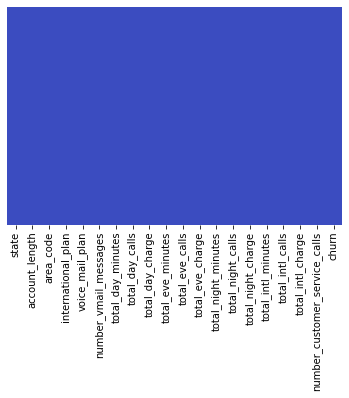

In [114]:
sns.heatmap(df.toPandas().isnull(), yticklabels=False, cbar=False,cmap='coolwarm')

Feature Selection 

1. Correlation in fatures

<AxesSubplot:>

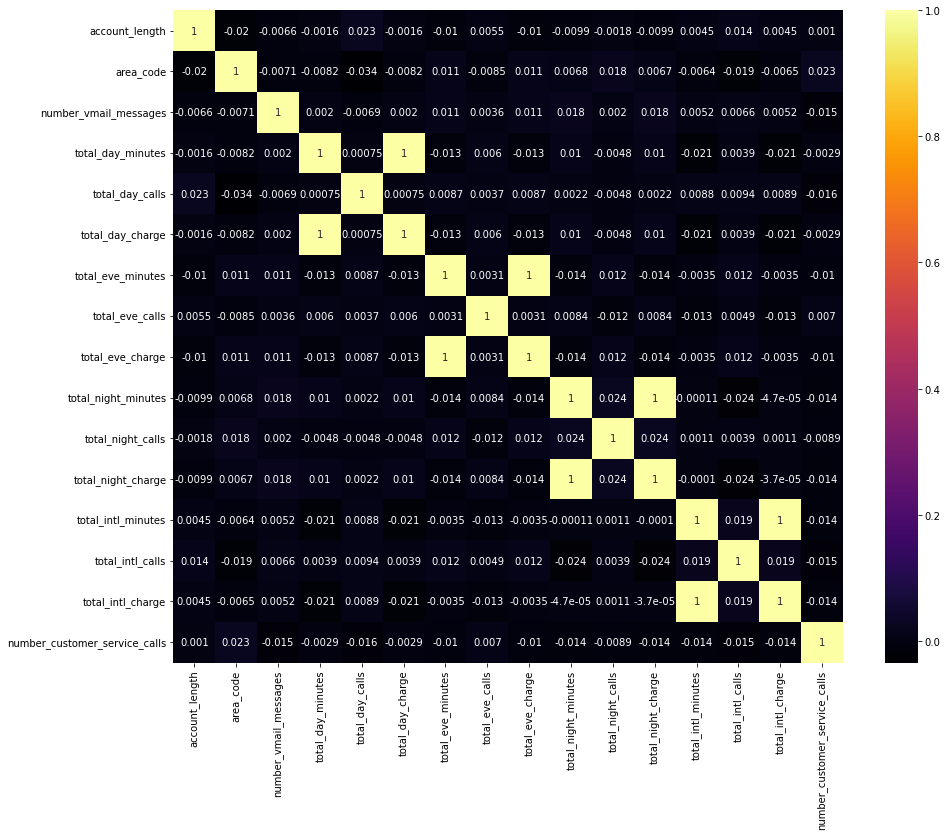

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
fig=sns.heatmap(df.toPandas().corr(), data=df.toPandas(),annot=True,cmap='inferno')
fig

In [116]:
# Here we have highly coorelated features like
# 1. total_intl_minutes with total_intl_charges
# 2. total_night_minutes with total_night_charges
# 3. total_eve_minutes with total_eve_chargers
# 4. total_day_minutes with total_day_charges
# so we keep only one from each pair 

In [117]:
copy_df = df

In [118]:
copy_df.columns

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [119]:
removal_col = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes']

In [120]:
copy_df = copy_df.drop(*(removal_col))

In [123]:
len(copy_df.columns), len(df.columns)

(16, 20)

2. Varience Threshold

3. chi square selector